P1.
(b) 6.36620e+18 groups/m^2
(c) -1.01994 C/m^2
(d) -1397.39 V


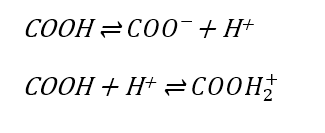

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image

print ('P1.')

# (b)
d = 100E-9 # m
n = 2E+5
sur_cover = n/(np.pi*d**2) # groups/m^2
print('(b) %.5e groups/m^2' %sur_cover)

# (c)
K_a = 10**(0.5) # mol/m^3
H = 10**(-4) # mol/m^3
e = 1.60217646E-19 # C
q = -e*K_a*sur_cover/(K_a+H) # C/m^2
print('(c) %.5f C/m^2' %q)

# (d)
epsilon_0 = 8.854E-12 # F/m
epsilon_water = 80.10
k_B = 1.38065E-23 # J/K
psi_s =((2*epsilon_0*epsilon_water*e**2*H*6.023E+23)/(k_B*298.15))**(-0.5)*q # V
print('(d) %.2f V' %psi_s)

# (a)
Image(filename='D:\\a.png')


P2.
(a) Debye length is 6.14582 nm


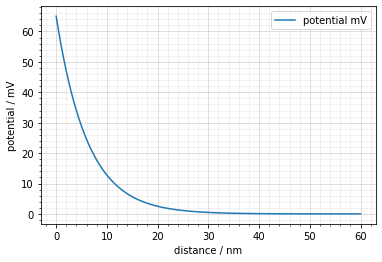

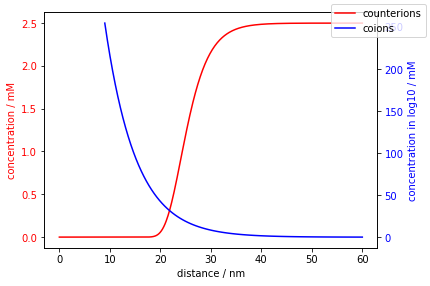

In fact when distance is small, the concentration of coinos should be infinity due the the positive charged surface


In [15]:
print ('P2.')

#（a）
I = 1/2*(2.5+2.5)*1E-3 # mol/L
n_b = I*1E+3*6.022E+23 # /m^3
K = ((epsilon_0*epsilon_water*k_B*298.15)/(2*e**2*1**2*n_b))**(1/2) # m
print ('(a) Debye length is %.5f nm' %(K*1E+9))

# (b)
psi_s = 65 # mV
# because it's 65mV so we can use D-H approxmation

def D_H (x):
    return psi_s*np.exp(-x/K) # mV

x_plot = np.linspace(0,6E-8,500)
y_plot = D_H(x_plot)

plt.plot(x_plot*1E+9, y_plot, label='potential mV')

plt.xlabel('distance / nm')
plt.ylabel('potential / mV')
plt.grid(b=1, which='major', linestyle='-', alpha=0.5)
plt.minorticks_on()
plt.grid(b=1, which='minor', linestyle='-', alpha=0.2)
plt.legend(loc=0)
plt.show()

def n_k_counter(x):
    return n_b*np.exp(-e*1*D_H(x)/(k_B*298.15))

def n_k_co(x):
    return n_b*np.exp(-e*-1*D_H(x)/(k_B*298.15))


x_plot_1 =np.linspace(9E-9,6E-8,100) 

fig, ax1 = plt.subplots()

ax1.set_xlabel('distance / nm')
ax1.set_ylabel('concentration / mM', color='red')
ax1.plot(x_plot*1E+9, n_k_counter(2*x_plot)/(6.023E+23), color='red', label='counterions')
ax1.tick_params(axis='y', labelcolor='red')

ax2 = ax1.twinx()
ax2.set_ylabel('concentration in log10 / mM', color='blue')  
ax2.plot(x_plot_1*1E+9, np.log10(n_k_co(x_plot_1)/(6.023E+23)),color='blue', label='coions')
ax2.tick_params(axis='y', labelcolor='blue')

fig.legend(loc=1)
fig.tight_layout()
plt.show()

print ('In fact when distance is small, the concentration of coinos should be infinity due the the positive charged surface')

P4.
(b) force is 2.70138e+04 N,because it is positive, thus the force is repulsive


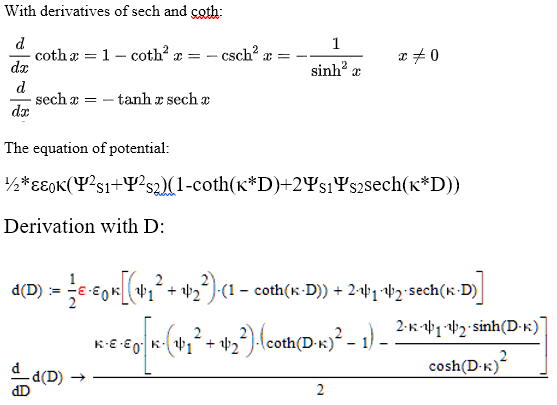

In [16]:
print ('P4.')

I = 16 # mM (mol/m^3)
psi_1 = -45E-3 # V
psi_2 = 25E-3 # V

n_b = I*6.022E+23 # /m^3
K_inv = ((epsilon_0*epsilon_water*k_B*298.15)/(2*e**2*1**2*n_b))**(1/2) # m (assume ion valance is +1)
K = K_inv**-1

# take derivity of psi_EL to D, we can get equation of force

def force_EL(D):
    return 1/2*epsilon_0*epsilon_water*K*((psi_1**2+psi_2**2)*K/(np.sinh(K*D)**2)-2*psi_1*psi_2*K*np.sinh(K*D)/((np.cosh(K*D))**2))

print ('(b) force is %.5e N,because it is positive, thus the force is repulsive' %force_EL(6E-9))

# (a)
Image(filename='D:\\b.png')